In [10]:
%pip install scikit-learn
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# garantir que o pacote seja instalado no ambiente do kernel
%pip install category_encoders

#importando as bibliotecas
from category_encoders import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [12]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

#carregando o dataset Servo
servo = fetch_ucirepo(id=87)

#separando features e target
X = servo.data.features
y = servo.data.targets

#metadados e variáveis
print(servo.metadata)

print(servo.variables)




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
{'uci_id': 87, 'name': 'Servo', 'repository_url': 'https://archive.ics.uci.edu/dataset/87/servo', 'data_url': 'https://archive.ics.uci.edu/static/public/87/data.csv', 'abstract': 'Data was from a simulation of a servo system', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 167, 'num_features': 4, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1986, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5Q30F', 'creators': ['Karl Ulrich'], 'intro_paper': None, 'additional_info': {'summary': 'Ross Quinlan:\r\n\r\nThis data was given to me by Karl Ulrich at MIT in 1986.  I didn\'t record his description at the time, but here\'s his subsequent (1992) recollection:\r\n \r\n"I seem to remember that the data was from

In [13]:
#juntando features e target em um único DataFrame
df = pd.concat([X, y], axis=1)
df.head()

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [14]:
#visualizando a quantidade de linhas e colunas
df.shape

(167, 5)

In [15]:
#visualizando os tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   motor   167 non-null    object 
 1   screw   167 non-null    object 
 2   pgain   167 non-null    int64  
 3   vgain   167 non-null    int64  
 4   class   167 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.7+ KB


In [16]:
#visualizando as estatísticas descritivas
df.describe()

,pgain,vgain,class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,1.389708
std,1.017770,1.369850,1.559635
min,3.000000,1.000000,0.131250
25%,3.000000,1.000000,0.503126
50%,4.000000,2.000000,0.731254
75%,5.000000,4.000000,1.259369
max,6.000000,5.000000,7.100108


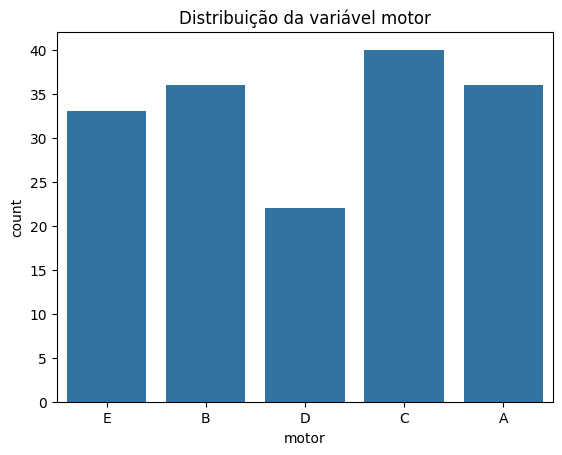

<Figure size 640x480 with 0 Axes>

In [17]:
# visualizando a distribuição da variável motor
sns.countplot(x='motor', data=df)
plt.title('Distribuição da variável motor')
plt.show()
plt.savefig('distribuicao_motor.png')

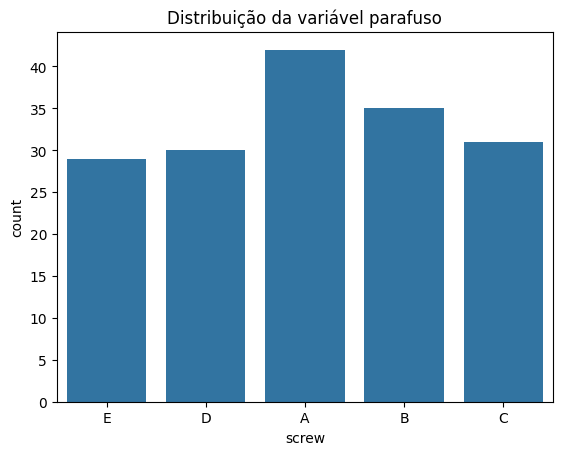

<Figure size 640x480 with 0 Axes>

In [18]:
# visualizando a distribuição da variável parafuso
sns.countplot(x='screw', data=df)
plt.title('Distribuição da variável parafuso')
plt.show()
plt.savefig('distribuicao_parafuso.png')

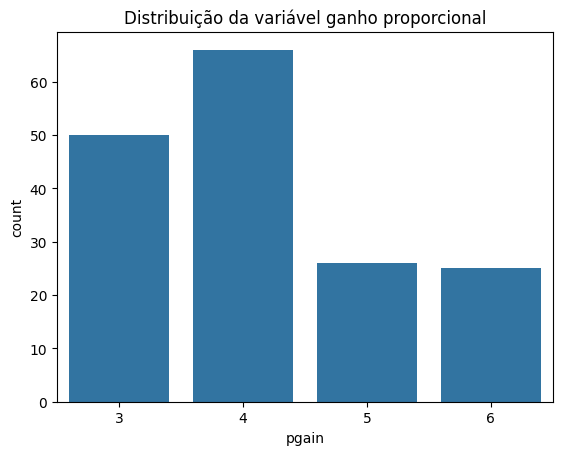

<Figure size 640x480 with 0 Axes>

In [19]:
# visualizando a distribuição da variável ganho proporcional
sns.countplot(x='pgain', data=df)
plt.title('Distribuição da variável ganho proporcional')
plt.show()
plt.savefig('distribuicao_ganho_proporcional.png')

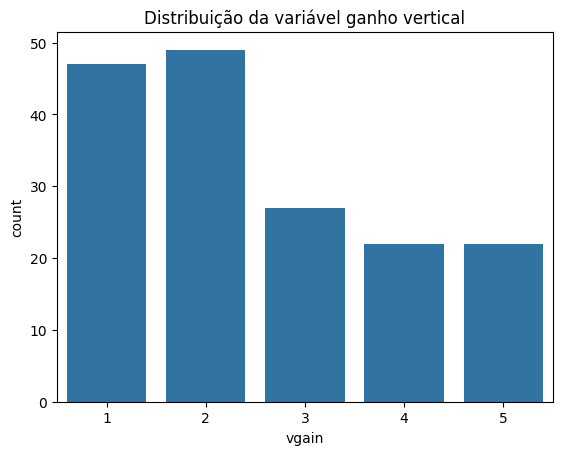

<Figure size 640x480 with 0 Axes>

In [20]:
# visualizando a distribuição da variável ganho vertical
sns.countplot(x='vgain', data=df)
plt.title('Distribuição da variável ganho vertical')
plt.show()
plt.savefig('distribuicao_ganho_vertical.png')

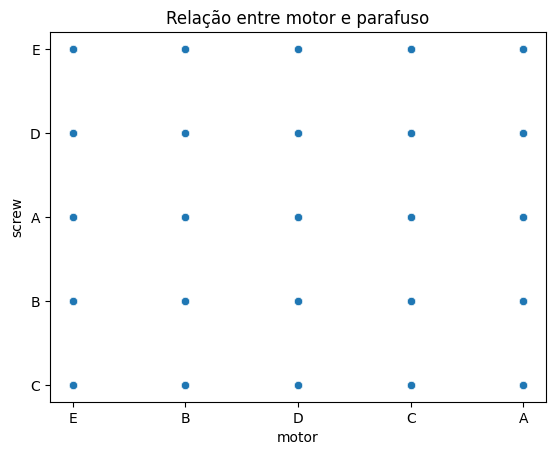

<Figure size 640x480 with 0 Axes>

In [21]:
# relação entre motor e parafuso
sns.scatterplot(x='motor', y='screw', data=df)
plt.title('Relação entre motor e parafuso')
plt.show()
plt.savefig('relacao_motor_parafuso.png')

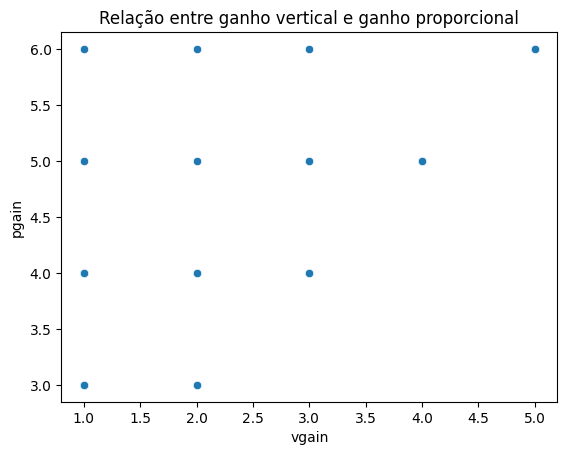

<Figure size 640x480 with 0 Axes>

In [22]:
# relação entre ganho vertical e ganho proporcional
sns.scatterplot(x='vgain', y='pgain', data=df)
plt.title('Relação entre ganho vertical e ganho proporcional')
plt.show()
plt.savefig('relacao_ganho_vertical_proporcional.png')

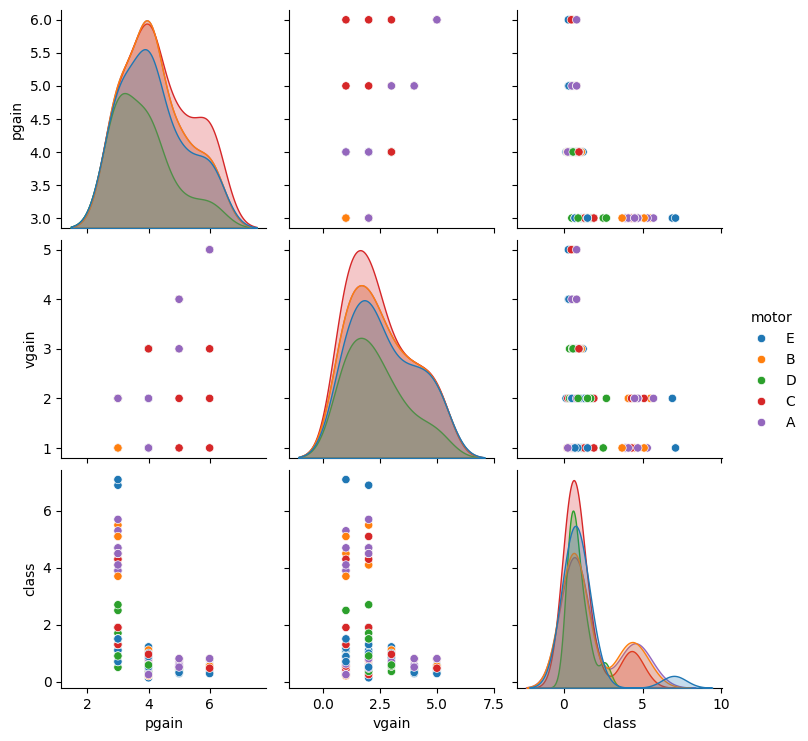

In [23]:
# pairplot para visualizar relações entre todas as variáveis com o target 'motor'
sns.pairplot(df, hue='motor')
plt.savefig('pairplot.png')

In [24]:
# dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# criando o pipeline para KNN
model_knn = Pipeline(steps=[
    ('one-hot encoder', OneHotEncoder()),
    ("Imputer", SimpleImputer()),
    ("knn", KNeighborsRegressor())
])

In [26]:
# treinando o modelo KNN
model_knn.fit(X_train, y_train)

,steps,"[('one-hot encoder', ...), ('Imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,"['motor', 'screw']"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,False


In [27]:
# avaliando o modelo KNN
y_pred_knn = model_knn.predict(X_test)

In [28]:
joblib.dump(model_knn, "model_knn_servo.pkl")

['model_knn_servo.pkl']

In [29]:
# criando o pipeline para Decision Tree
model_dt = Pipeline(steps=[
    ('one-hot encoder', OneHotEncoder()),
    ("Imputer", SimpleImputer()),
    ("tree", DecisionTreeRegressor())
])

In [30]:
# treinando o modelo Decision Tree
model_dt.fit(X_train, y_train)

,steps,"[('one-hot encoder', ...), ('Imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,"['motor', 'screw']"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,False


In [31]:
# avaliando o modelo Decision Tree
y_pred_dt = model_dt.predict(X_test)

In [32]:
joblib.dump(model_dt, "model_dt_servo.pkl")

['model_dt_servo.pkl']

In [33]:
# criando o pipeline para Random Forest
model_rf = Pipeline(steps=[
    ('one-hot encoder', OneHotEncoder()),
    ("Imputer", SimpleImputer()),
    ("forest", RandomForestRegressor(n_estimators=100))
])

In [34]:
# treinando o modelo Random Forest
model_rf.fit(X_train, y_train.values.ravel())

,steps,"[('one-hot encoder', ...), ('Imputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,"['motor', 'screw']"
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,False


In [35]:
# avaliando o modelo Random Forest
y_pred_rf = model_rf.predict(X_test)

In [36]:
joblib.dump(model_rf, "model_rf_servo.pkl")

['model_rf_servo.pkl']

In [37]:
# comparando os modelos
print("KNN:", r2_score(y_test, y_pred_knn))
print("Decision Tree:", r2_score(y_test, y_pred_dt))
print("Random Forest:", r2_score(y_test, y_pred_rf))


KNN: 0.7506369192917788
Decision Tree: 0.7649680026139801
Random Forest: 0.8673672552583658
